In [ ]:
%pip install opencv-python matplotlib

import cv2
import numpy as numpy
import matplotlib.pyplot as plt



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
def read_file(filename2):
    img = cv2.imread(filename2)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)

    plt.show()
    return img

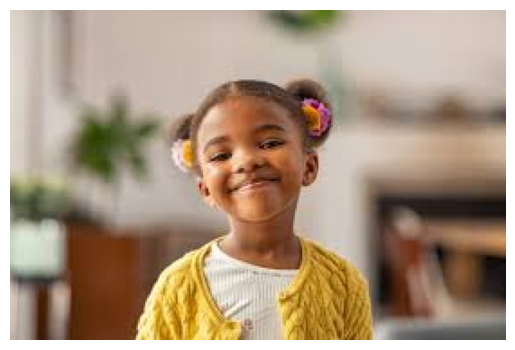

array([[[220, 210, 200],
        [220, 210, 200],
        [219, 209, 199],
        ...,
        [206, 192, 183],
        [206, 192, 183],
        [206, 192, 183]],

       [[220, 210, 200],
        [220, 210, 200],
        [219, 209, 199],
        ...,
        [207, 193, 184],
        [207, 193, 184],
        [207, 193, 184]],

       [[221, 211, 201],
        [220, 210, 200],
        [219, 209, 199],
        ...,
        [207, 193, 184],
        [207, 193, 184],
        [207, 193, 184]],

       ...,

       [[190, 175, 168],
        [193, 178, 171],
        [188, 175, 167],
        ...,
        [ 85,  86,  78],
        [ 85,  86,  78],
        [ 85,  86,  78]],

       [[187, 172, 165],
        [190, 175, 168],
        [186, 173, 165],
        ...,
        [ 81,  82,  74],
        [ 81,  82,  74],
        [ 81,  82,  74]],

       [[185, 170, 163],
        [188, 173, 166],
        [184, 171, 163],
        ...,
        [ 78,  79,  71],
        [ 78,  79,  71],
        [ 78,  79,  71]]

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_file(filename2):
    img = cv2.imread(filename2)
    if img is None:
        raise FileNotFoundError(f"File not found or not a valid image: {filename2}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Optional: hides axes
    plt.show()
    return img

# Run the function
filename2 = "download.jpeg"
read_file(filename2)


#create Edge Mask

In [9]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert image to grayscale
    gray_blur = cv2.medianBlur(gray, blur_value)  # Smooth the image to reduce noise
    edges = cv2.adaptiveThreshold(
        gray_blur,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        line_size,
        blur_value
    )
    return edges


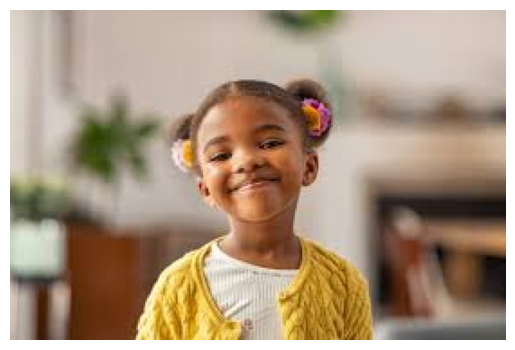

In [10]:
img = read_file("download.jpeg")
edges = edge_mask(img, line_size=7, blur_value=7)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


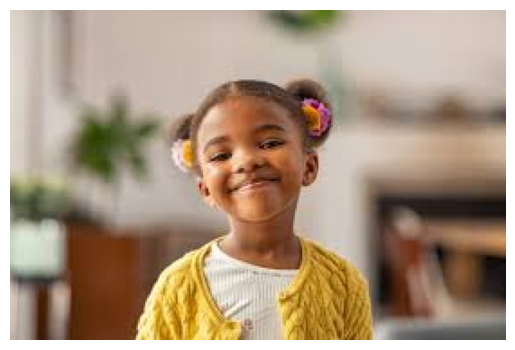

In [12]:
line_size, blur_value = 7, 7
img = read_file(filename2)
edges = edge_mask(img, line_size, blur_value)


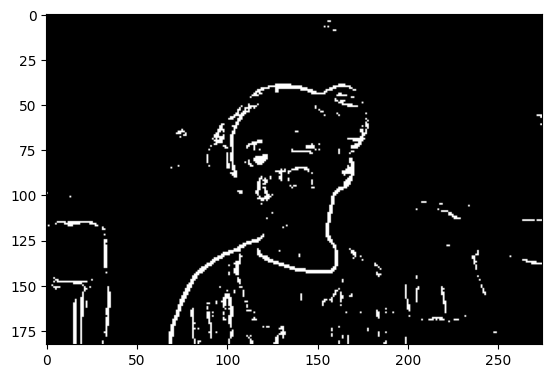

In [13]:
line_size,blur_value =5,7
edges = edge_mask(img , line_size, blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

In [14]:
def color_quantizattion(img , k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER,20,0.001)

    ret , label , center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.unit8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [15]:



img = color_quantization(img, k=2)

plt.imshow(edges, cmap ="binary")
plt.show()


NameError: name 'color_quantization' is not defined

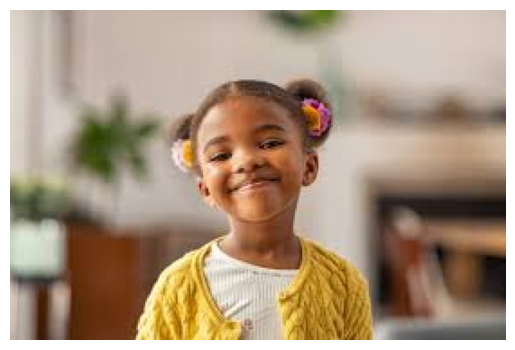

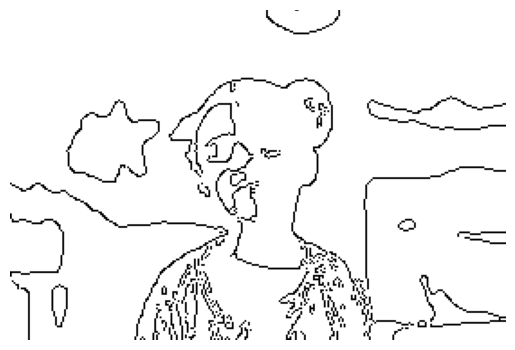

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_quantization(img, k):
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

# Load image using existing filenamee and read_file function
img = read_file(filename2)

# Apply color quantization
img = color_quantization(img, k=2)

# Detect edges
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# Show result
plt.imshow(edges, cmap="binary")
plt.axis('off')
plt.show()


In [17]:
def cartoon(blurred):
    c = cv2.bitwise_add(blurred, blurred , mask=edges)
    

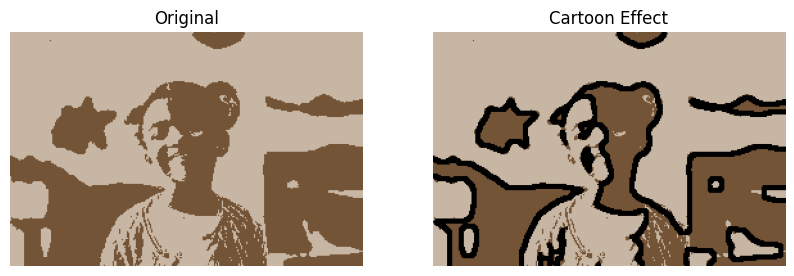

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_quantization(img, k):
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    _, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

def cartoonify(img):
    # Step 1: Use the provided image
    # img is already in RGB format

    # Step 2: Reduce noise
    blurred = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 3: Edge detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.adaptiveThreshold(cv2.medianBlur(gray, 7), 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, blockSize=9, C=2)

    # Step 4: Color quantization
    quantized = color_quantization(blurred, k=9)

    # Step 5: Combine edges with color image
    cartoon = cv2.bitwise_and(quantized, quantized, mask=edges)

    # Display result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Cartoon Effect")
    plt.imshow(cartoon)
    plt.axis('off')
    plt.show()

# Call the function
# Call the function using the already loaded image
cartoonify(img)


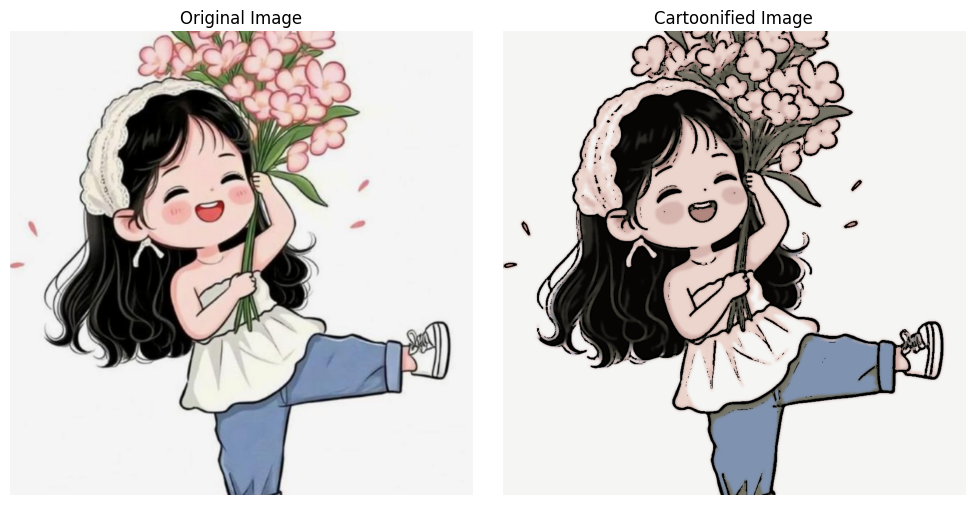

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        raise FileNotFoundError(f"File not found: {filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Step 2: Create edge mask
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, line_size, blur_value)
    return edges

# Step 3: Reduce color palette
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Apply KMeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    _, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

# Step 4: Combine edges and quantized color
def cartoonify_image(img, line_size=7, blur_value=7, k=9):
    edges = edge_mask(img, line_size, blur_value)
    quantized = color_quantization(img, k)
    blurred = cv2.bilateralFilter(quantized, d=9, sigmaColor=200, sigmaSpace=200)
    cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
    return cartoon

# Step 5: Run the pipeline
filename = "port.png"  # Your image file
img = read_file(filename)
cartoon_img = cartoonify_image(img)

# Show Original vs Cartoon
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cartoon_img)
plt.title("Cartoonified Image")
plt.axis('off')

plt.tight_layout()
plt.show()
